In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
###### OPTIMIZATION
import os.path

pd.set_option('display.max_rows', 20)
list_of_raw_df = []

root_dir = '/Users/gfrosi/Documents/Frosi_lab_jacques/test_pipeline_encode/BigWig_test/output_correlate_fraglen_h3k4me3/output_correlate/'

file_name = open(os.path.join(root_dir,'srr_list.txt'), 'r')

for line in file_name:
    df_file_name = os.path.join(root_dir, line.strip())
    df = pd.read_csv(df_file_name, sep="\t", header=None, names=['File1','File2', 'correlation'])
    list_of_raw_df.append(df)
    

In [323]:
######OPTIMIXZATION
# REMOVE LINE FROM FIRST DF

list_of_raw_df[0] = list_of_raw_df[0].drop(list_of_raw_df[0][list_of_raw_df[0]['File2'].str.contains("-orig.merged.raw.bigwig")].index)

list_of_raw_df[0].reset_index(inplace=True, drop=True)

list_of_raw_df[0]

,File1,File2,correlation
0,SRR1168196_1-frag-100.merged.raw.bigwig,SRR1168196_1-frag-105.merged.raw.bigwig,0.996815
1,SRR1168196_1-frag-100.merged.raw.bigwig,SRR1168196_1-frag-200.merged.raw.bigwig,0.896861
2,SRR1168196_1-frag-100.merged.raw.bigwig,SRR1168196_1-frag-300.merged.raw.bigwig,0.840939
3,SRR1168196_1-frag-100.merged.raw.bigwig,SRR1168196_1-frag-400.merged.raw.bigwig,0.822195
4,SRR1168196_1-frag-100.merged.raw.bigwig,SRR1168196_1-frag-500.merged.raw.bigwig,0.805989
...,...,...,...
23,SRR1168196_1-frag-400.merged.raw.bigwig,SRR1168196_1.merged.nodup_x_ctl_for_rep4.fc.si...,0.109806
24,SRR1168196_1-frag-400.merged.raw.bigwig,SRR1168196_1.merged.nodup_x_ctl_for_rep4.pval....,0.108214
25,SRR1168196_1-frag-500.merged.raw.bigwig,SRR1168196_1.merged.nodup_x_ctl_for_rep4.fc.si...,0.099637
26,SRR1168196_1-frag-500.merged.raw.bigwig,SRR1168196_1.merged.nodup_x_ctl_for_rep4.pval....,0.097094


In [35]:
# REMOVE LINE FROM EIGHT DF

list_of_raw_df[7] = list_of_raw_df[7].drop(list_of_raw_df[7][list_of_raw_df[7]['File2'].str.contains("-orig.merged.raw.bigwig")].index)

list_of_raw_df[7].reset_index(inplace=True, drop=True)

#list_of_raw_df[7]

In [21]:
######OPTIMIZATION
def replace_substring_bigwig(list_df, regex:[()], columns:[]):
    
    list_of_df_plot = []
    
    for df in list_df:        
        df_local = df.copy()    
        for col in columns:
            for i in regex:
                 df_local[col]= df_local[col].str.replace(i[0],i[1])
                    
        list_of_df_plot.append(df_local)

    
    return list_of_df_plot

list_of_regex = [(r'.signal-testd.bigwig', ''), (r'.merged.raw.bigwig', ''), (r'\.\w+\.\w{19}\d+', ''), (r'.bigwig', '')]
columns=['File1', 'File2']

list_of_df_plot = replace_substring_bigwig(list_of_raw_df,list_of_regex, columns) 
                                           
                          

In [324]:
list_of_df_plot[0]

,File1,File2,correlation
0,SRR1168196_1-frag-100,SRR1168196_1-frag-105,0.996815
1,SRR1168196_1-frag-100,SRR1168196_1-frag-200,0.896861
2,SRR1168196_1-frag-100,SRR1168196_1-frag-300,0.840939
3,SRR1168196_1-frag-100,SRR1168196_1-frag-400,0.822195
4,SRR1168196_1-frag-100,SRR1168196_1-frag-500,0.805989
...,...,...,...
23,SRR1168196_1-frag-400,SRR1168196_1.fc.signal,0.109806
24,SRR1168196_1-frag-400,SRR1168196_1.pval,0.108214
25,SRR1168196_1-frag-500,SRR1168196_1.fc.signal,0.099637
26,SRR1168196_1-frag-500,SRR1168196_1.pval,0.097094


In [254]:
######OPTIMIZATION
#pivoted dfs

def pivot(list_of_df_plot):
    
    list_of_piv_df = []
    
    for df in list_of_df_plot:
        result = df.pivot_table(index='File1', columns='File2', values='correlation')

        #transposed table
        list_of_piv_df.append(result)
    
    return list_of_piv_df


In [255]:
#Pivoting tables
list_of_piv_t_df = pivot(list_of_df_plot)


In [325]:
list_of_piv_t_df[0]

File2,SRR1168196_1-frag-105,SRR1168196_1-frag-200,SRR1168196_1-frag-300,SRR1168196_1-frag-400,SRR1168196_1-frag-500,SRR1168196_1.fc.signal,SRR1168196_1.pval
File1,,,,,,,
SRR1168196_1-frag-100,0.996815,0.896861,0.840939,0.822195,0.805989,0.205774,0.210164
SRR1168196_1-frag-105,NaN,0.905803,0.850333,0.831293,0.815212,0.208468,0.212869
SRR1168196_1-frag-200,NaN,NaN,0.958678,0.933684,0.915779,0.153636,0.155353
SRR1168196_1-frag-300,NaN,NaN,NaN,0.976475,0.958010,0.125627,0.125341
SRR1168196_1-frag-400,NaN,NaN,NaN,NaN,0.984517,0.109806,0.108214
SRR1168196_1-frag-500,NaN,NaN,NaN,NaN,NaN,0.099637,0.097094
SRR1168196_1.fc.signal,NaN,NaN,NaN,NaN,NaN,NaN,0.953059


In [ ]:
#optimazing missing column and row

In [257]:
#To get a complete diagonal, adding the missing row and column to our pivoted df

#DONE

def add_row_col(list_of_piv_t_df):
    
    list_df_add_rc = []

    for df in list_of_piv_t_df:
        
        index = df.index.tolist()
        cols = df.columns.tolist()

        #creating a new row 
        
        new_df = df.append(pd.Series(name=cols[-1]))
        new_df[index[0]] = np.nan
        
        #creating a new column and change its place 
        new_cols = new_df.columns.tolist()
        new_cols = new_cols[-1:] + new_cols[:-1]

        
        final_df =  new_df[new_cols]
        

        list_df_add_rc.append(final_df)
        
        
    return list_df_add_rc


list_df_add_rc = add_row_col(list_of_piv_t_df[:])

    


In [327]:
list_df_add_rc[0]

File2,SRR1168196_1-frag-100,SRR1168196_1-frag-105,SRR1168196_1-frag-200,SRR1168196_1-frag-300,SRR1168196_1-frag-400,SRR1168196_1-frag-500,SRR1168196_1.fc.signal,SRR1168196_1.pval
File1,,,,,,,,
SRR1168196_1-frag-100,NaN,0.996815,0.896861,0.840939,0.822195,0.805989,0.205774,0.210164
SRR1168196_1-frag-105,NaN,NaN,0.905803,0.850333,0.831293,0.815212,0.208468,0.212869
SRR1168196_1-frag-200,NaN,NaN,NaN,0.958678,0.933684,0.915779,0.153636,0.155353
SRR1168196_1-frag-300,NaN,NaN,NaN,NaN,0.976475,0.958010,0.125627,0.125341
SRR1168196_1-frag-400,NaN,NaN,NaN,NaN,NaN,0.984517,0.109806,0.108214
SRR1168196_1-frag-500,NaN,NaN,NaN,NaN,NaN,NaN,0.099637,0.097094
SRR1168196_1.fc.signal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.953059
SRR1168196_1.pval,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [322]:
#Filling na with zeros and Mirror dfs


#filling the nan cases with zero /
#Mirror the data

def fill_na_mirror(list_df_add_rc):
    
    mirror = []

    for df in list_df_add_rc:
        df_zero = df.fillna(0)
        df_mirror = df_zero + df_zero.T - np.diag(np.diag(df_zero))

        mirror.append(df_mirror)

    return(mirror)



list_df_mirror = fill_na_mirror(list_df_add_rc[:])
#list_df_mirror[0]

In [326]:
list_df_mirror[0]

File2,SRR1168196_1-frag-100,SRR1168196_1-frag-105,SRR1168196_1-frag-200,SRR1168196_1-frag-300,SRR1168196_1-frag-400,SRR1168196_1-frag-500,SRR1168196_1.fc.signal,SRR1168196_1.pval
File1,,,,,,,,
SRR1168196_1-frag-100,0.000000,0.996815,0.896861,0.840939,0.822195,0.805989,0.205774,0.210164
SRR1168196_1-frag-105,0.996815,0.000000,0.905803,0.850333,0.831293,0.815212,0.208468,0.212869
SRR1168196_1-frag-200,0.896861,0.905803,0.000000,0.958678,0.933684,0.915779,0.153636,0.155353
SRR1168196_1-frag-300,0.840939,0.850333,0.958678,0.000000,0.976475,0.958010,0.125627,0.125341
SRR1168196_1-frag-400,0.822195,0.831293,0.933684,0.976475,0.000000,0.984517,0.109806,0.108214
SRR1168196_1-frag-500,0.805989,0.815212,0.915779,0.958010,0.984517,0.000000,0.099637,0.097094
SRR1168196_1.fc.signal,0.205774,0.208468,0.153636,0.125627,0.109806,0.099637,0.000000,0.953059
SRR1168196_1.pval,0.210164,0.212869,0.155353,0.125341,0.108214,0.097094,0.953059,0.000000


In [330]:
#fill diagonal with 1


def fill_diag(list_df_mirror):
    
    list_mirror_diag = []

    for df in list_df_mirror:
        list_index = df.index.tolist()
        list_columns = df.columns.tolist()

    #     print(list_columns)

        for i in list_index:
            for c in list_columns:
                if i == c:
    #                 print(i,c)
                    df.loc[i,c]=1

        list_mirror_diag.append(df)
    return list_mirror_diag


list_mirror_diag_cluster = fill_diag(list_df_mirror[:])



In [331]:
list_mirror_diag_cluster[0]

File2,SRR1168196_1-frag-100,SRR1168196_1-frag-105,SRR1168196_1-frag-200,SRR1168196_1-frag-300,SRR1168196_1-frag-400,SRR1168196_1-frag-500,SRR1168196_1.fc.signal,SRR1168196_1.pval
File1,,,,,,,,
SRR1168196_1-frag-100,1.000000,0.996815,0.896861,0.840939,0.822195,0.805989,0.205774,0.210164
SRR1168196_1-frag-105,0.996815,1.000000,0.905803,0.850333,0.831293,0.815212,0.208468,0.212869
SRR1168196_1-frag-200,0.896861,0.905803,1.000000,0.958678,0.933684,0.915779,0.153636,0.155353
SRR1168196_1-frag-300,0.840939,0.850333,0.958678,1.000000,0.976475,0.958010,0.125627,0.125341
SRR1168196_1-frag-400,0.822195,0.831293,0.933684,0.976475,1.000000,0.984517,0.109806,0.108214
SRR1168196_1-frag-500,0.805989,0.815212,0.915779,0.958010,0.984517,1.000000,0.099637,0.097094
SRR1168196_1.fc.signal,0.205774,0.208468,0.153636,0.125627,0.109806,0.099637,1.000000,0.953059
SRR1168196_1.pval,0.210164,0.212869,0.155353,0.125341,0.108214,0.097094,0.953059,1.000000


# Clustermap

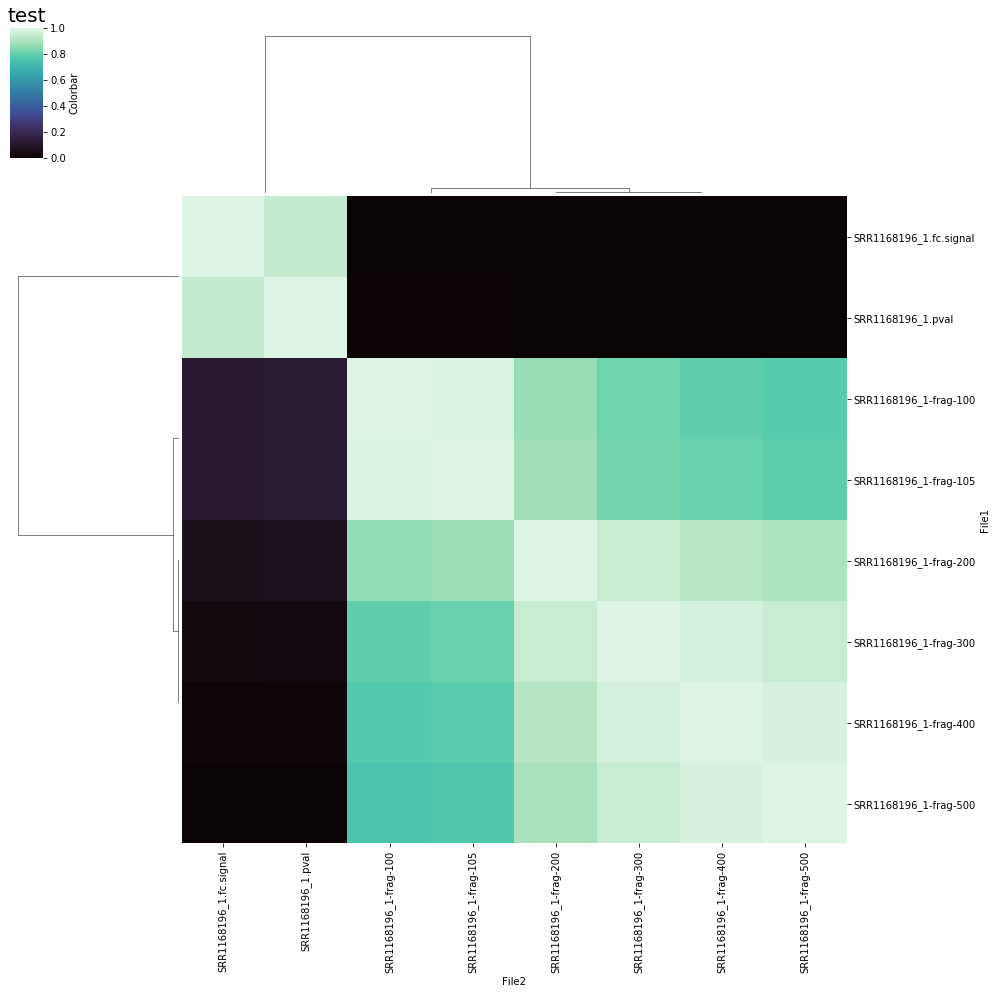

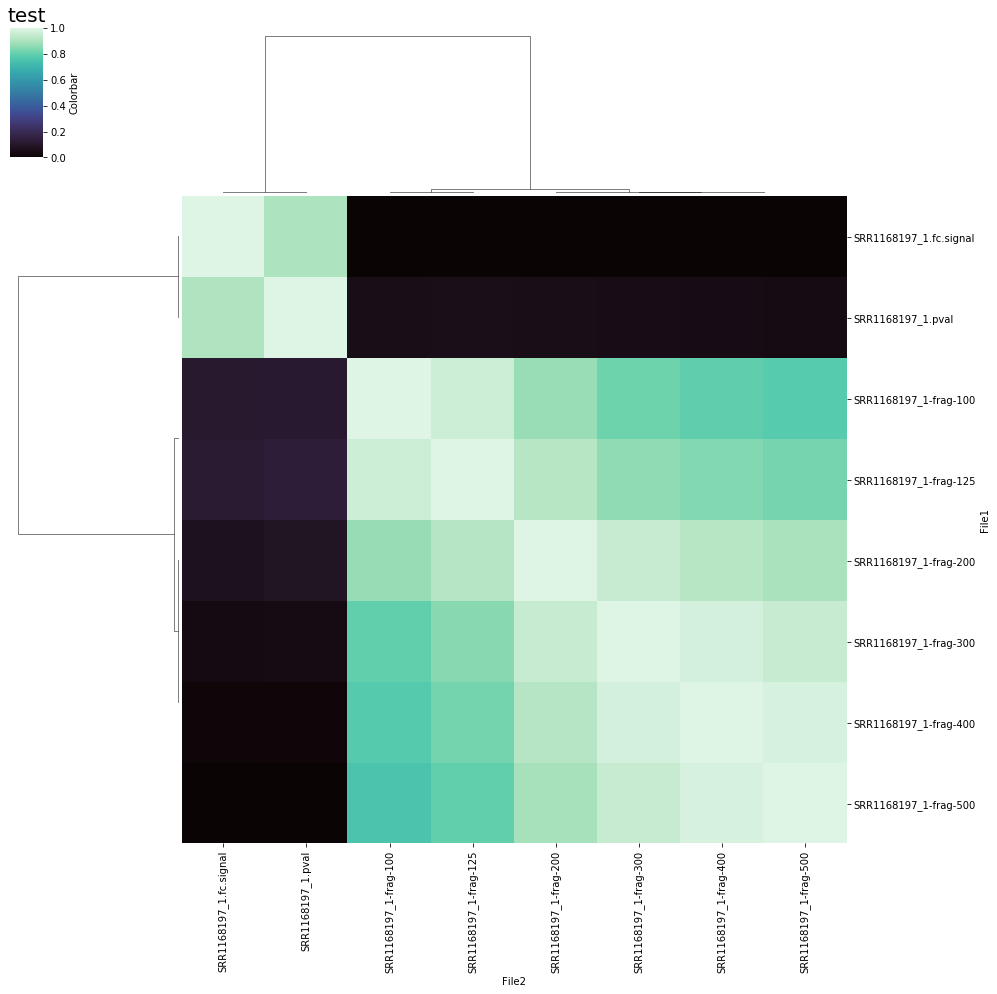

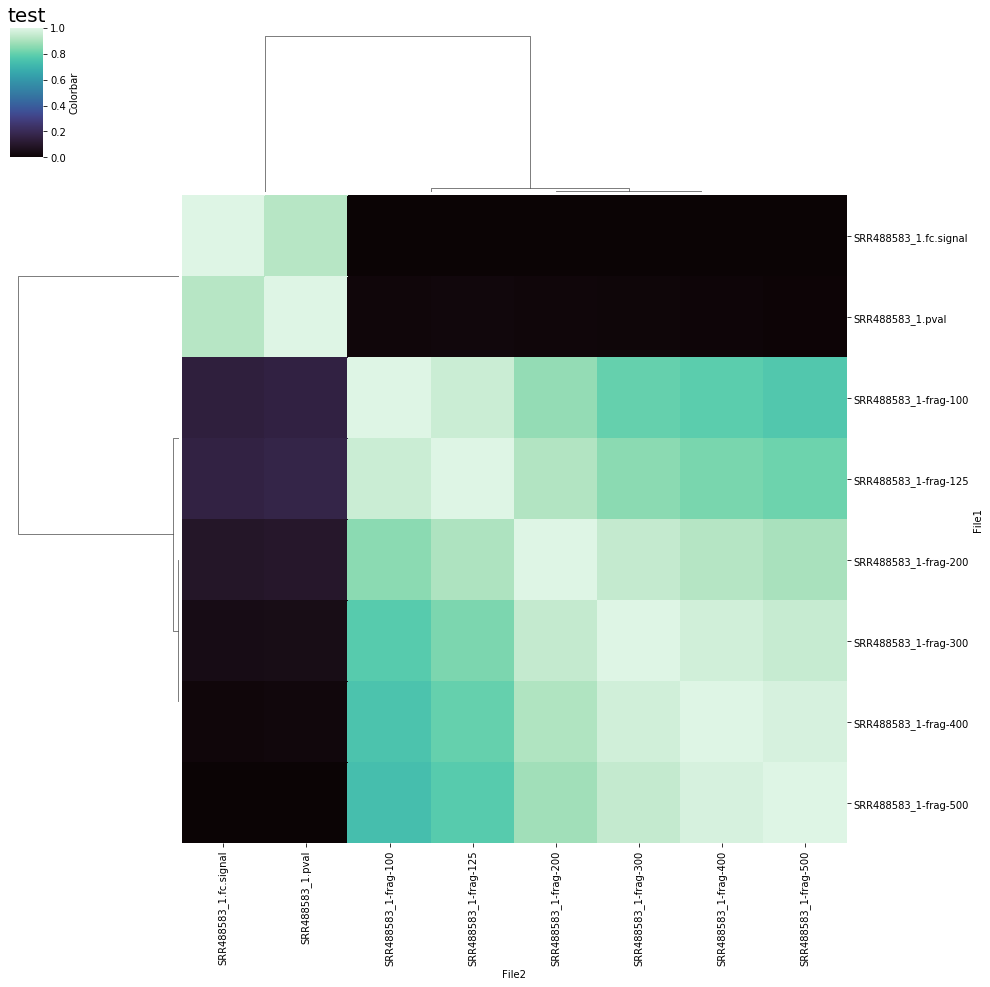

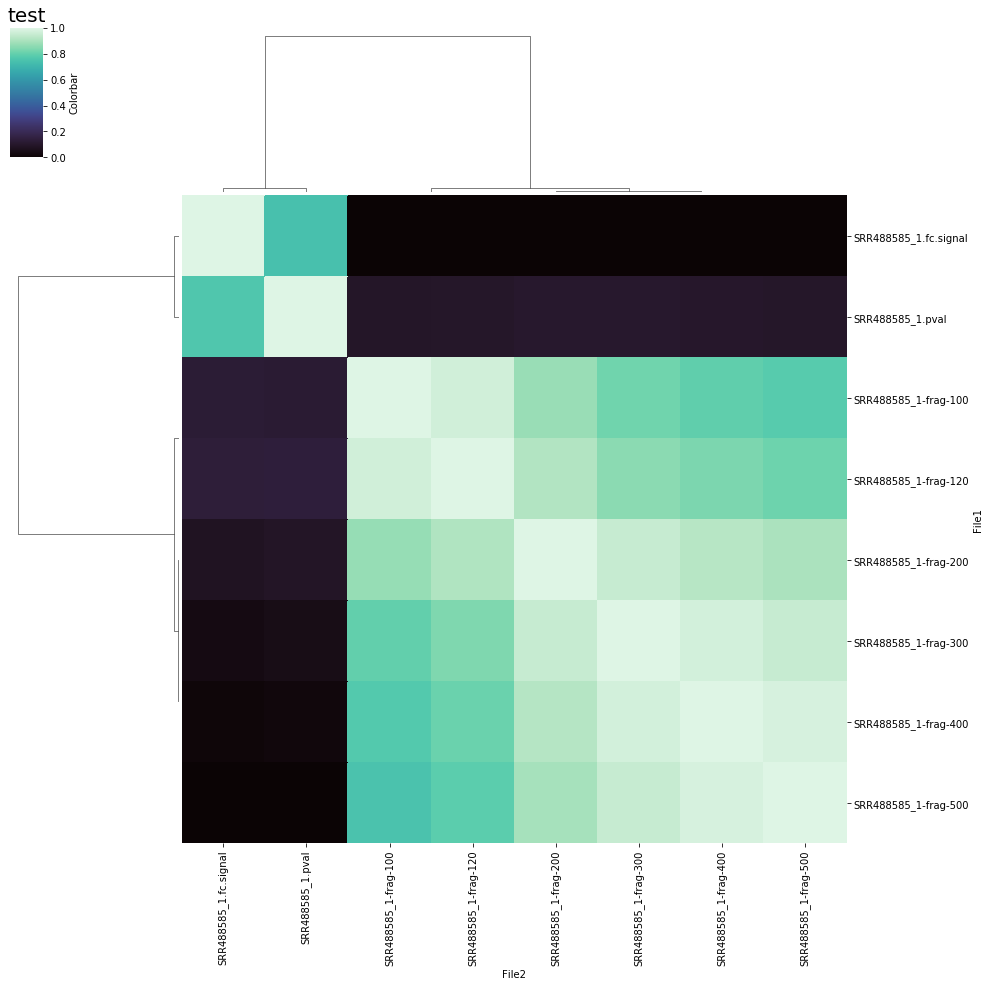

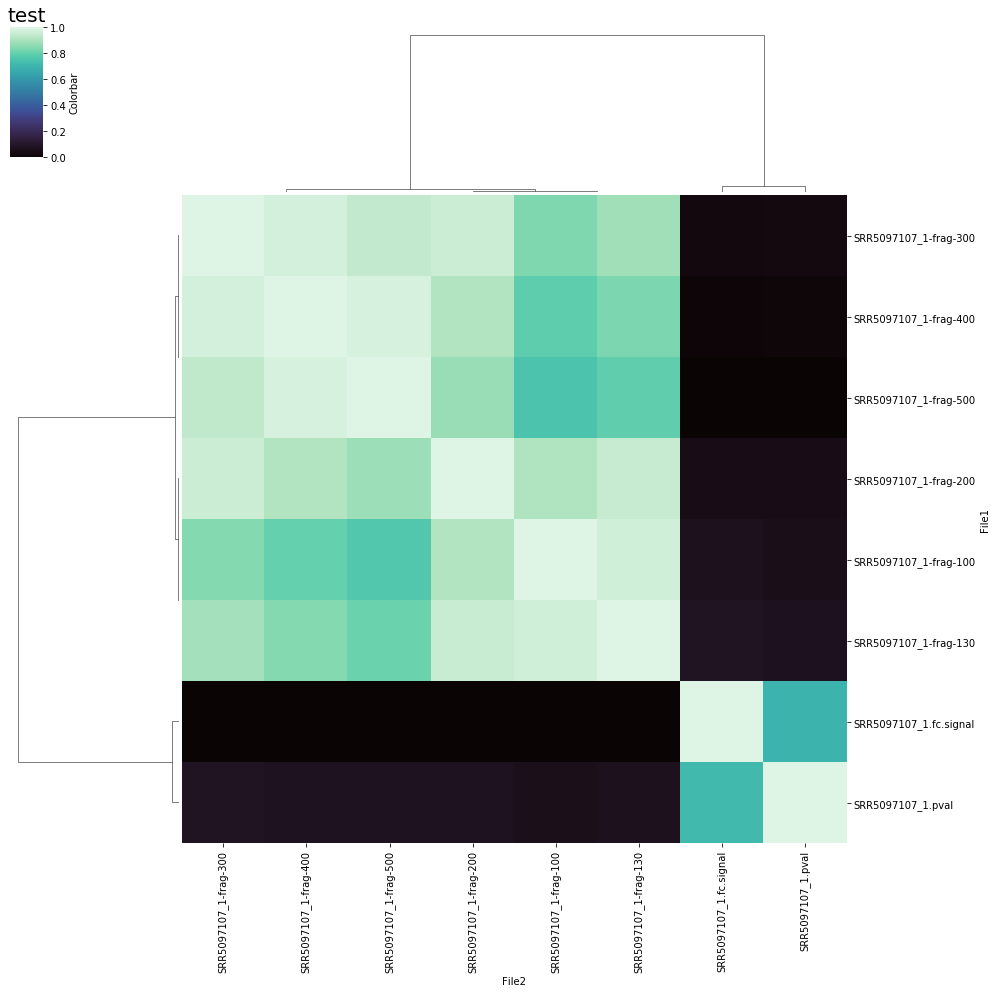

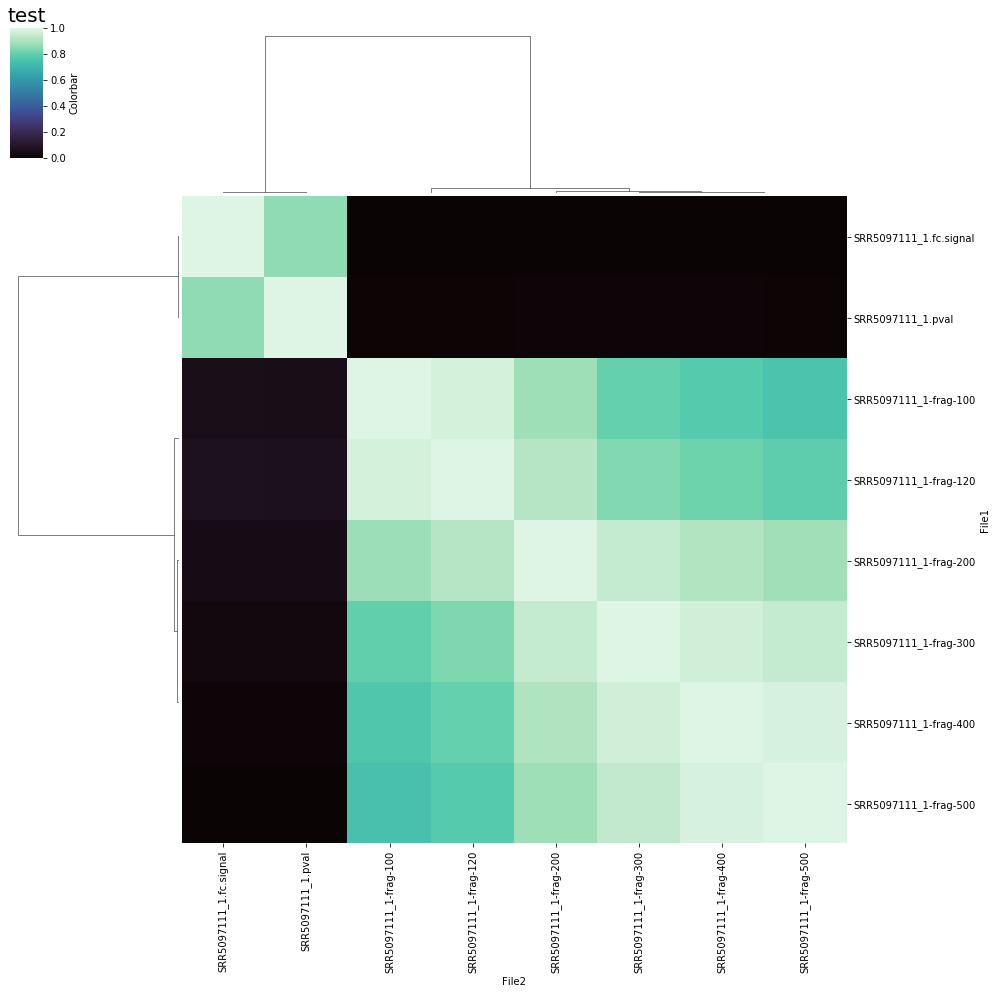

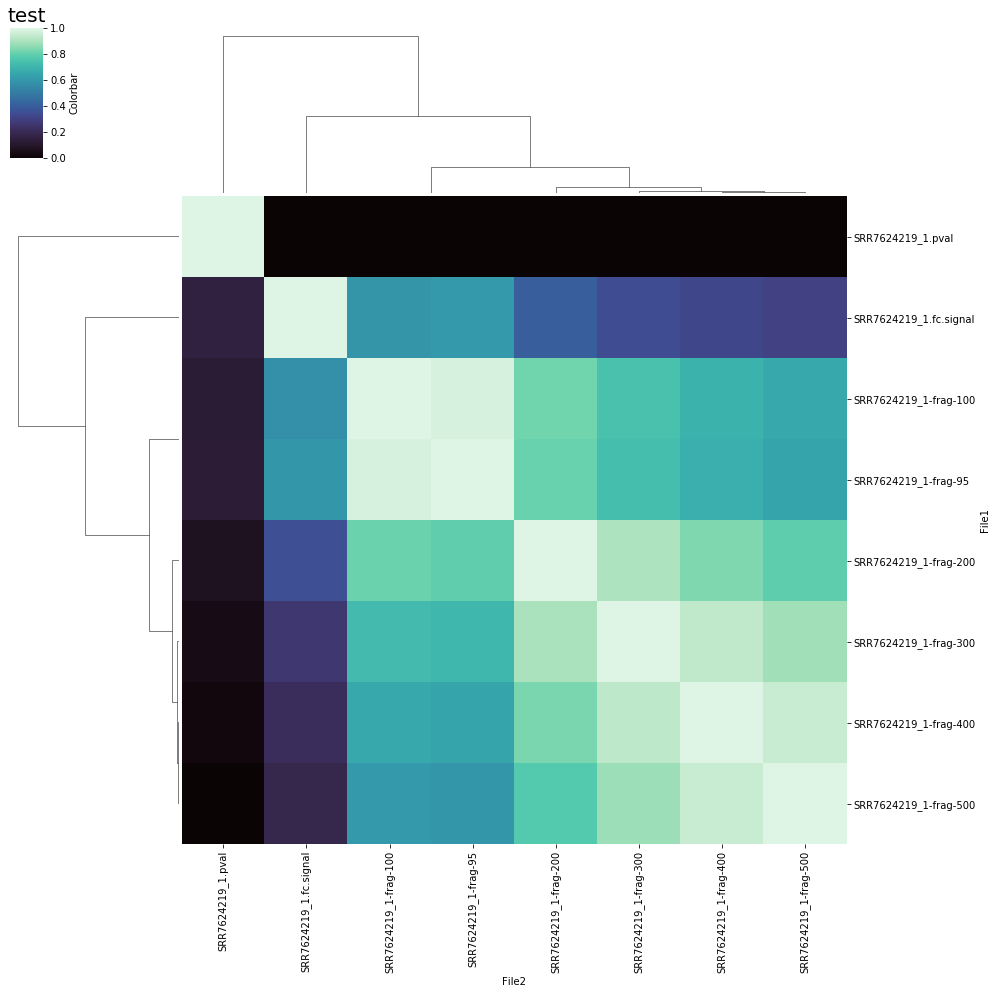

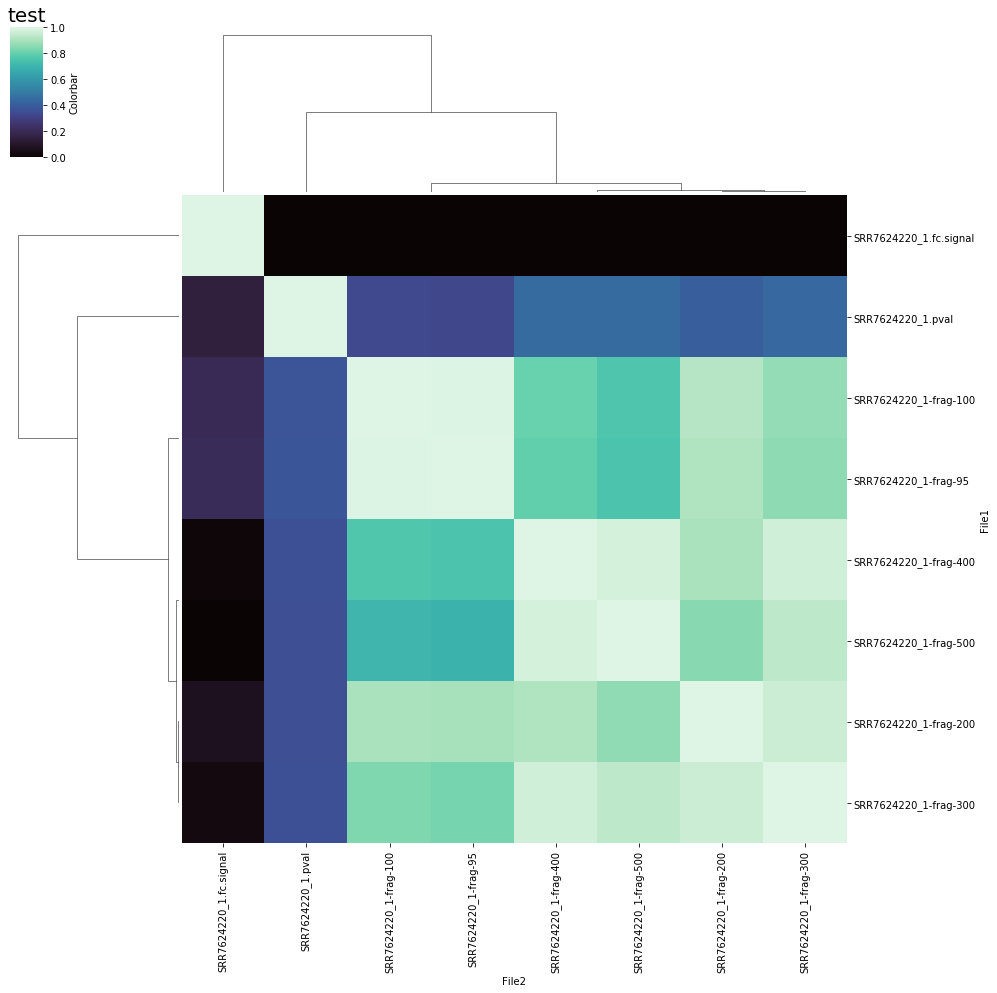

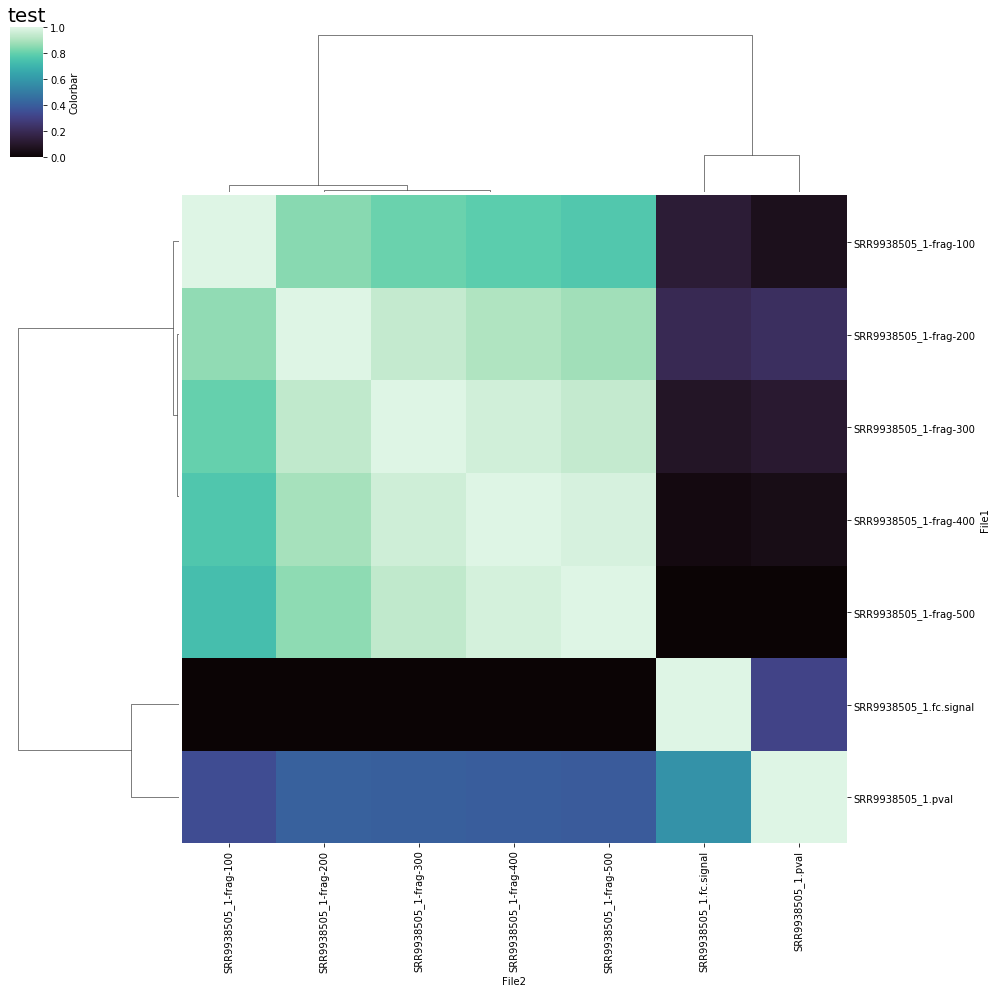

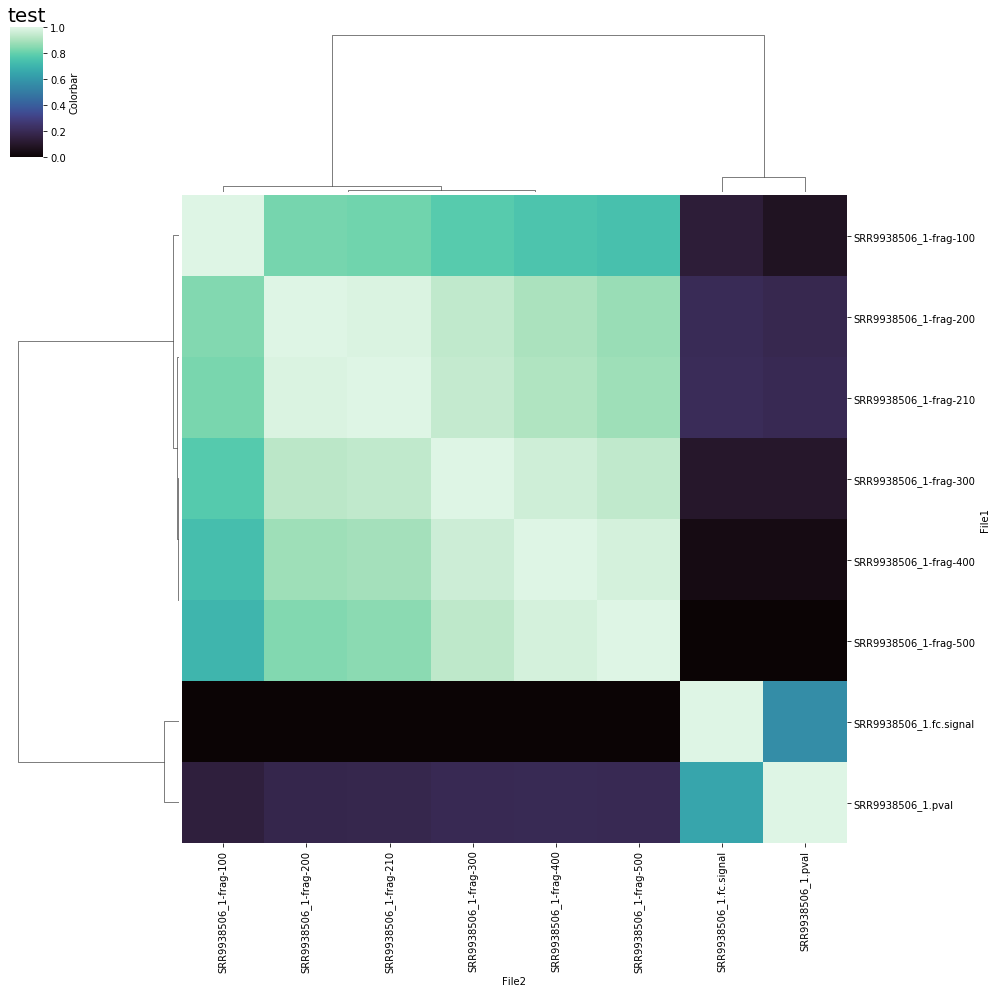

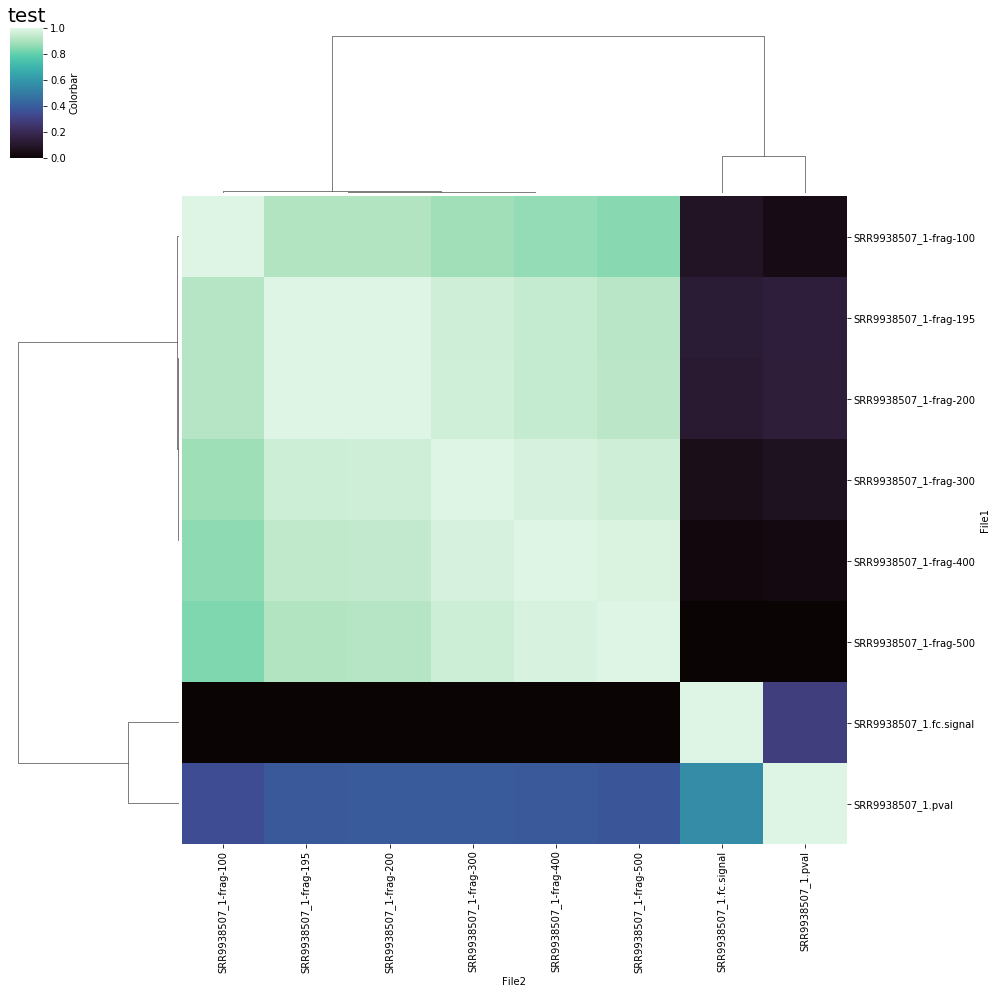

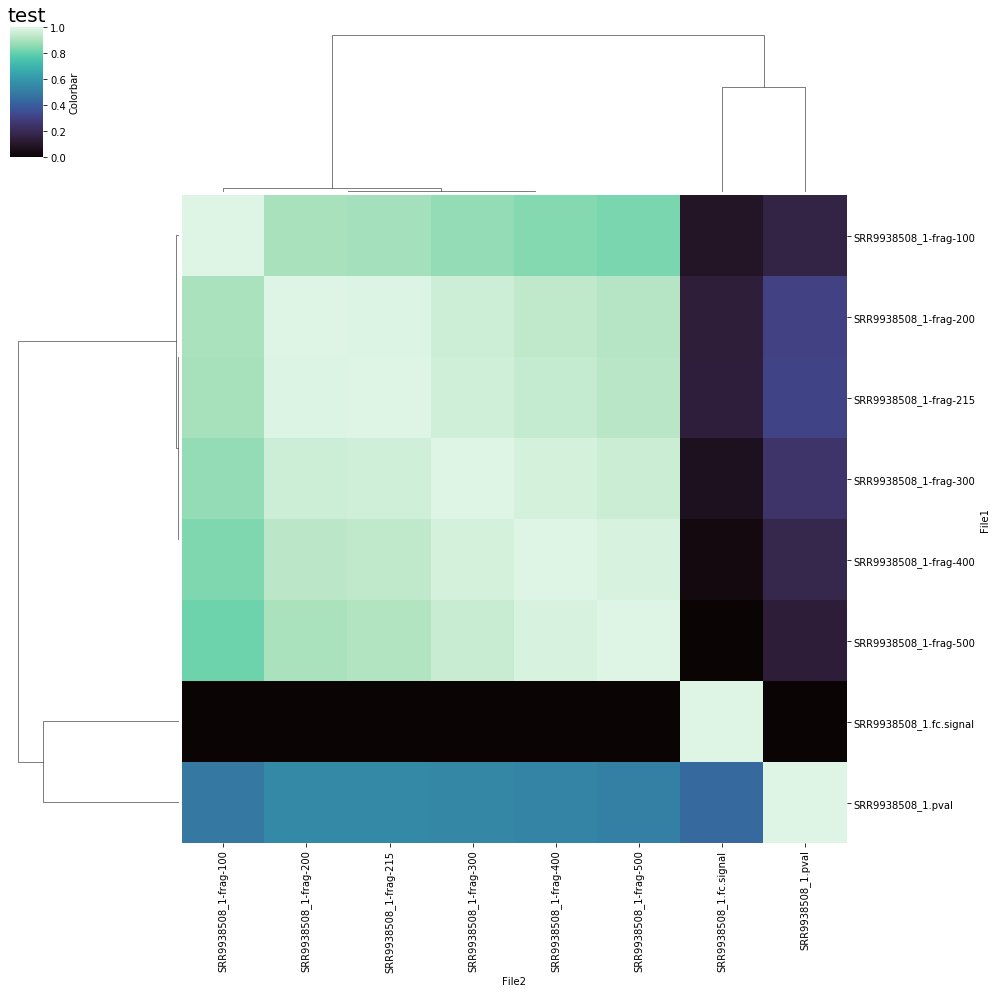

In [321]:
#code

def clustermap(list_mirror_diag_cluster, num):
    
    g = sns.clustermap(df_mirror, cmap="mako", standard_scale=1, metric="correlation", 
                       cbar_kws={'label': 'Colorbar'})
    fig = plt.gcf()
    fig.set_size_inches(15,15)
    plt.gcf().get_axes()[2].set_ylim(df_mirror.shape[0]-0.01, -0.01)
    #fig.set_ylim(df_mirror.shape[0]-0.5, -0.5)
    plt.title("test", fontsize =20)
    plt.show()

for i,df_mirror in enumerate(list_mirror_diag_cluster):

    clustermap(df_mirror, i + 1)
